In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import geoplot.crs as ccrs
%matplotlib inline

In [3]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))

In [23]:
census_tracts = gpd.read_file("./data/nyc_census_tracts_2010.geojson", driver='GeoJSON')

In [4]:
from geoplot import geoplot as gplt

In [5]:
cc = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [20]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

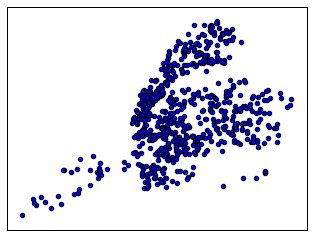

In [14]:
gplt.pointplot(cc, projection=ccrs.PlateCarree())

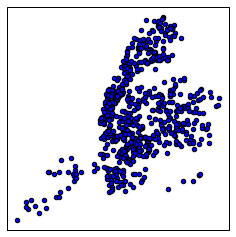

In [19]:
gplt.pointplot(cc, projection=ccrs.AlbersEqualArea())

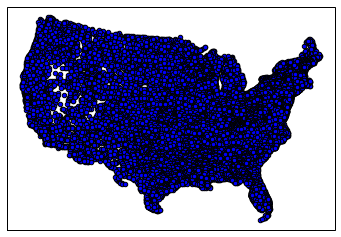

In [21]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea())

In [12]:
# import mplleaflet
# gplt.pointplot(cc)
# mplleaflet.display()

In [24]:
from random import randint
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]

In [26]:
cc.geometry.centroid

DATE
08/25/2015                  POINT (-73.9203819 40.7329414)
06/24/2016                   POINT (-74.0074061 40.703385)
06/24/2016           POINT (-73.95066609999999 40.6431277)
06/24/2016    POINT (-74.00156559999999 40.71729929999999)
06/24/2016           POINT (-73.9335177 40.79859320000001)
06/24/2016                  POINT (-73.9777752 40.6082883)
06/24/2016           POINT (-73.89946929999999 40.6790235)
06/24/2016           POINT (-73.81984890000001 40.8900764)
06/24/2016           POINT (-73.94423399999999 40.8474611)
06/24/2016                  POINT (-73.9437879 40.7109013)
06/24/2016                  POINT (-73.9501533 40.6832699)
06/24/2016           POINT (-73.89685859999999 40.8238479)
06/24/2016                  POINT (-73.9813242 40.6799525)
06/24/2016           POINT (-73.8307396 40.76768389999999)
06/24/2016           POINT (-73.86908079999999 40.8310849)
06/24/2016                  POINT (-73.8266119 40.8846495)
06/24/2016           POINT (-73.9559457 40.69686710

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(139)choropleth()
-> xmin = np.min(envelopes.map(lambda linearring: np.min([linearring.coords[1][0],
(Pdb) c
-74.2555913638 40.4961153952 -73.7000090639 40.915532777


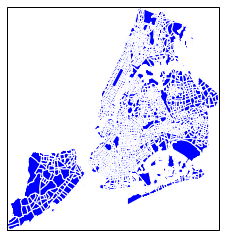

In [57]:
gplt.choropleth(census_tracts, projection=ccrs.AlbersEqualArea(), edgecolor='white')

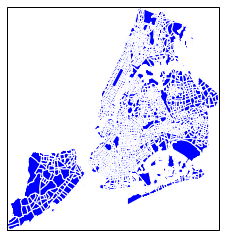

In [39]:
gplt.choropleth(census_tracts, projection=ccrs.AlbersEqualArea(), edgecolor='white')

In [ ]:
# If we are not handed a projection we are in the PateCarree projection. In that case we can return a
# `matplotlib` plot directly, which has the advantage of being native to e.g. mplleaflet.
if not projection:
    return plt.scatter(xs, ys)

# Otherwise, we have to deal with projection settings.
proj_params = dict(projection.proj4_params)
globe = projection.globe